# Trabalho Final - Machine Learning

* integrante 1
* integrante 2
* integrante 3
* integrante 4

Neste trabalho, como parte do time de analistas da Quantum Finance, vocês deverão explorar uma base de dados originalmente utilizada para classificação de score de crédito, disponível no Kaggle (https://www.kaggle.com/datasets/parisrohan/credit-score-classification), utilizando técnicas de Análise Exploratória de Dados (EDA) e algoritmos de Machine Learning supervisionados. 


O objetivo é aplicar e interpretar os resultados obtidos, assim como criar um sistema que gere valor a partir da análise da base de dados.

**Modelo de Classificação Supervisionada**


Desenvolver um modelo de classificação supervisionada para prever a classificação de crédito dos indivíduos presentes na base.


Passos esperados:

1. Realizar uma análise exploratória dos dados (EDA) para entender as características principais da base e as relações entre variáveis; 2 pontos

2. Implementar um pipeline de modelo de classificação usando Random Forest, XGBoost e LightGBM. Use GridSearch para otimizar os parametros de cada modelo; 4 pontos

3. Avaliar os resultados utilizando a métrica mais adequada e **justifique** sua escolha; 2 pontos

4. Apresentar os resultados, indicando a métrica no conjunto de treino (train.csv) e explicar como o modelo pode ser utilizado para decisões financeiras. 2 pontos


Entregáveis:

1. Este jupyter notebook executado e com os resultados aparentes (não serão aceitos outros formatos)

<p style='color:#006DB2' ><big><strong>1.</strong></big> <i>Importação de Bibliotecas
Importa as principais bibliotecas para análise de dados, visualização e machine learning:</p>
<p style='color:#006DB2' >
pandas, numpy: manipulação de dados
seaborn, matplotlib: gráficos
sklearn: modelos, pré-processamento e validação
xgboost, lightgbm: algoritmos de ML avançados </i></p>

In [1]:
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from pandas import DataFrame

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




<p style='color:#006DB2' ><big><strong>2.</strong></big> <i>Carregamento dos Dados
Carrega o arquivo de dados principal para um DataFrame. </i></p> 

In [2]:
df = pd.read_csv("train.csv")  
df.describe().round(2)  # proporção de valores ausentes por coluna


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.00,100000.00,100000.00,100000.00,100000.00,98035.00,100000.00,100000.00
mean,4194.17,17.09,22.47,72.47,21.07,27.75,32.29,1403.12
std,3183.69,117.40,129.06,466.42,14.86,193.18,5.12,8306.04
min,303.65,-1.00,0.00,1.00,-5.00,0.00,20.00,0.00
25%,1625.57,3.00,4.00,8.00,10.00,3.00,28.05,30.31
50%,3093.75,6.00,5.00,13.00,18.00,6.00,32.31,69.25
75%,5957.45,7.00,7.00,20.00,28.00,9.00,36.50,161.22
max,15204.63,1798.00,1499.00,5797.00,67.00,2597.00,50.00,82331.00



<i><p style='color:#006DB2' ><big><strong>3.</strong></big> Tratamento de Dados </p>
<p style='color:#006DB2' >Converte colunas para tipos numéricos e trata valores inconsistentes:</p>
<p style='color:#006DB2' >
Usa pd.to_numeric(..., errors='coerce') para garantir que os dados estejam no formato correto.
Mapeia variáveis categóricas para valores numéricos (ex: Credit_Score, Credit_Mix, Payment_of_Min_Amount). </p></i>

In [ ]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce').astype(float)
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce').astype(float)
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').astype(float)
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce').astype(float)
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce').astype(float)
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').astype(float)
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce').astype(float)
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').astype(float)
score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df['Credit_Score'] = df['Credit_Score'].map(score_map).astype('Int64')

score_map2 = {'Bad': 0, 'Standard': 1, 'Good': 2, '_': None}
df['Credit_Mix'] = df['Credit_Mix'].map(score_map2).astype('Int64')

score_map3 = {'NM': 0, 'No': 1, 'Yes': 2}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(score_map3).astype('Int64')




<i><p style='color:#006DB2' ><big><strong>4.</strong></big> Limpeza de Colunas Específicas </p>
<p style='color:#006DB2' >Remove caracteres indesejados e converte para numérico:</p>
<p style='color:#006DB2' >Age e Credit_History_Age passam por limpeza de strings e conversão para números. </p></i>

In [ ]:
df['Age'] = (
    df['Age']
    .astype(str)
    .str.replace('-', '', regex=False)
    .str.replace(' ', '', regex=False)  
    .str.replace('_', '', regex=False) 
    .str.replace('nan', '', regex=False)  
    .str.strip()
)

df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype(int)

df['Credit_History_Age'] = (
    df['Credit_History_Age']
    .astype(str)
    .str.replace(' Years and ', '.', regex=False)
    .str.replace(' Months', '', regex=False) 
    .str.replace(' ', '', regex=False) 
    .str.replace('nan', '', regex=False) 
    .str.strip()
)

df['Credit_History_Age'] = pd.to_numeric(df['Credit_History_Age'], errors='coerce').astype(float)

<i><p style='color:#006DB2' ><big><strong>5.</strong></big> Função para Remoção de Outliers </p>
<p style='color:#006DB2' >Remove outliers de colunas numéricas usando o método do IQR.</p></i>

In [4]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

<i><p style='color:#006DB2' ><big><strong>6.</strong></big>Aplicação da Remoção de Outliers</p>
<p style='color:#006DB2' >Aplica a função para várias colunas relevantes do DataFrame.</p></i>

In [5]:
df = remove_outliers_iqr(df, 'Num_Bank_Accounts')
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Num_Credit_Card')
df = remove_outliers_iqr(df, 'Interest_Rate')
df = remove_outliers_iqr(df, 'Num_of_Loan')
df = remove_outliers_iqr(df, 'Num_of_Delayed_Payment')
df = remove_outliers_iqr(df, 'Num_Credit_Inquiries')
df = remove_outliers_iqr(df, 'Annual_Income')
df = remove_outliers_iqr(df, 'Total_EMI_per_month')
df = remove_outliers_iqr(df, 'Monthly_Balance')
df = remove_outliers_iqr(df, 'Amount_invested_monthly')
df = remove_outliers_iqr(df, 'Credit_Mix')


<i><p style='color:#006DB2' ><big><strong>7.</strong></big> Tratamento de Valores Nulos </p>
<p style='color:#006DB2' >Preenche valores nulos com a média das colunas:</p></i>

In [6]:
media_age = df['Credit_History_Age'].mean()
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(media_age)

media_mon = df['Monthly_Inhand_Salary'].mean()
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(media_mon)

<i><p style='color:#006DB2' ><big><strong>8.</strong></big> Preparação dos Dados para Modelagem</p>
<p style='color:#006DB2' >Define as variáveis numéricas (var_num)</p></i>

In [8]:
var_num = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age',
    'Credit_Mix'
]




<i><p style='color:#006DB2' ><big><strong>9.</strong></big> Análise Exploratória </p>
<p style='color:#006DB2' ><li style='color:#006DB2' >Exibe estatísticas descritivas das variáveis numéricas.</li>
<li style='color:#006DB2' >Gera histogramas para visualizar distribuições.</li>
<li style='color:#006DB2' >Calcula e exibe matriz de correlação e heatmap.</li></p></i>

In [9]:
df[var_num].describe().round(2)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age,Credit_Mix
count,36938.00,36938.00,36938.00,36938.00,36938.00,36938.00,36938.00,36938.00,36938.00,36169.00,36938.00,36577.00,36938.00,36938.00,36938.00,36938.00,36938.00,36938.0
mean,32.87,35995.29,2999.59,5.64,5.70,15.46,3.78,22.37,13.97,10.82,6.19,1534.62,31.98,81.87,133.84,354.91,17.57,0.98
std,10.72,23583.32,1818.22,2.54,2.07,8.86,2.43,15.22,6.15,6.91,3.90,1191.88,4.99,75.46,93.75,127.25,7.94,0.72
min,14.00,7005.93,303.65,-1.00,0.00,1.00,0.00,-5.00,-3.00,-6.44,0.00,0.23,21.26,0.00,0.00,0.10,0.10,0.0
25%,24.00,17518.21,1575.05,4.00,4.00,8.00,2.00,11.00,10.00,5.69,3.00,629.26,27.80,27.76,62.83,268.82,11.70,0.0
50%,33.00,30738.51,2918.76,6.00,6.00,15.00,4.00,19.00,15.00,9.72,6.00,1271.65,32.00,57.58,108.08,323.48,17.57,1.0
75%,41.00,48615.22,3587.85,8.00,7.00,21.00,6.00,29.00,19.00,15.57,9.00,2173.47,36.20,113.16,180.38,417.52,23.20,2.0
max,56.00,142635.52,11708.29,11.00,11.00,34.00,9.00,67.00,28.00,36.49,17.00,4998.07,43.57,347.57,431.28,740.50,33.80,2.0


In [10]:
print("Estatísticas descritivas:")
display(df.describe(include='all').transpose())


Estatísticas descritivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,36938,36938,0x25fe1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,36938,10749,CUS_0xbcb9,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,36938,8,March,4680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,33211,8895,Deepa Seetharamanm,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,36938.0,NaN,NaN,NaN,32.869998,10.7219,14.0,24.0,33.0,41.0,56.0
SSN,36938,10679,#F%$D@*&8,2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,36938,16,_______,2589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,36938.0,NaN,NaN,NaN,35995.290193,23583.317322,7005.93,17518.21125,30738.51,48615.22,142635.52
Monthly_Inhand_Salary,36938.0,NaN,NaN,NaN,2999.589136,1818.222405,303.645417,1575.050417,2918.765,3587.851667,11708.293333
Num_Bank_Accounts,36938.0,NaN,NaN,NaN,5.639694,2.535193,-1.0,4.0,6.0,8.0,11.0


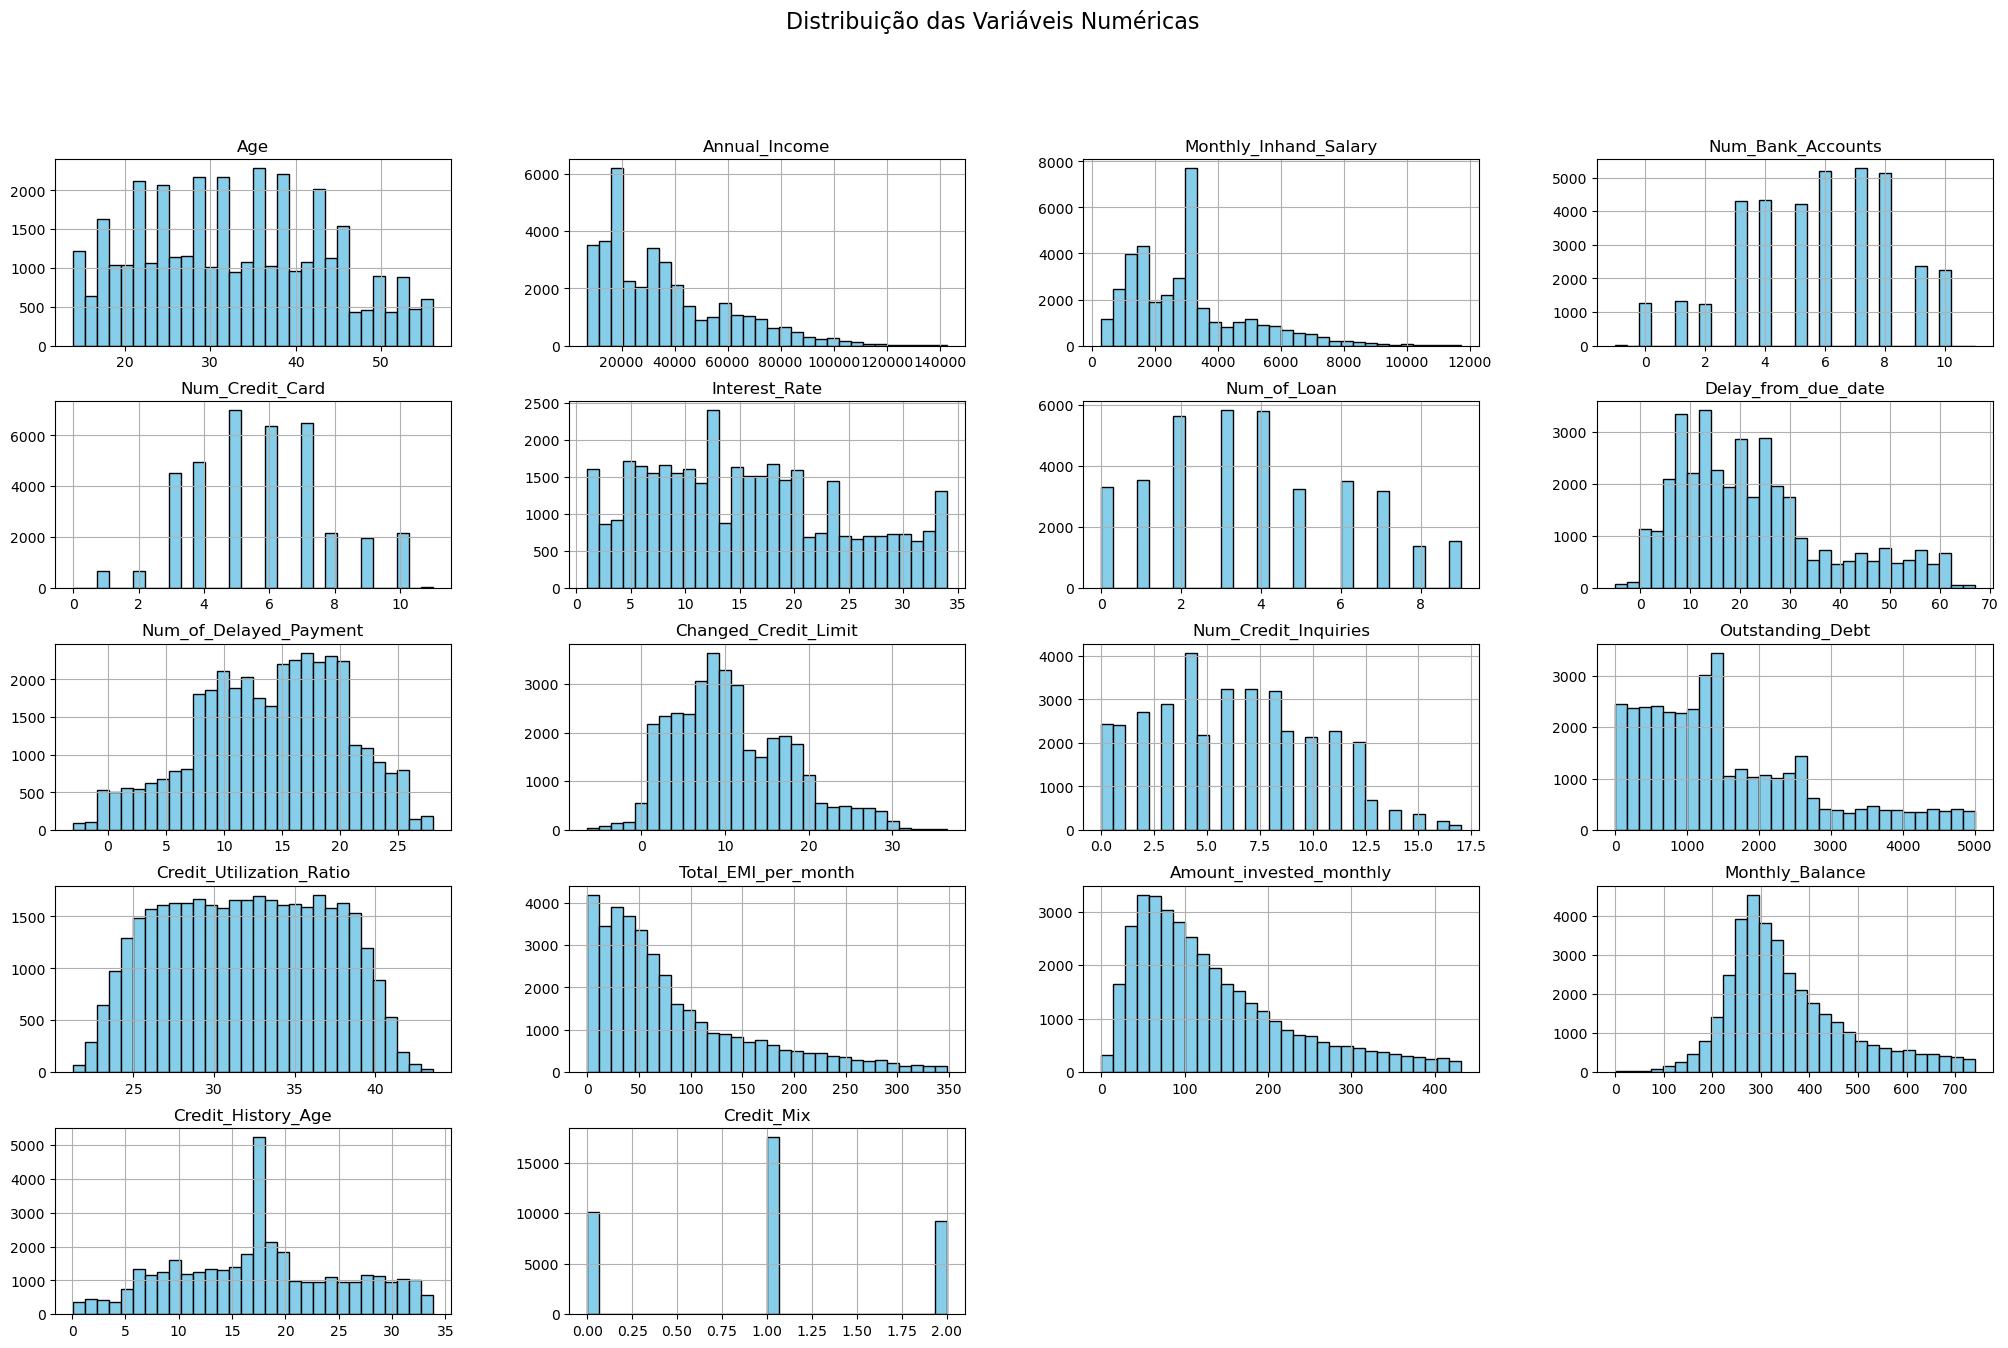

In [11]:
df[var_num].hist(bins=30, figsize=(25,15), color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.show()

Exibindo a matriz de correlação.

In [12]:
print("\nMatriz de correlação:")
corr = df.corr(numeric_only=True)
display(corr)


Matriz de correlação:


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
Age,1.000000,0.054531,0.047084,-0.195050,-0.148584,-0.217974,-0.205653,-0.174220,-0.185342,-0.152876,-0.246758,0.247915,-0.201438,0.012754,0.224700,-0.160495,-0.096559,0.028618,0.116606,0.162520
Annual_Income,0.054531,1.000000,0.919115,-0.154223,-0.131049,-0.179431,-0.139391,-0.139692,-0.148667,-0.102622,-0.167860,0.189691,-0.184500,0.098313,0.168282,-0.096717,0.597468,0.543391,0.724140,0.112151
Monthly_Inhand_Salary,0.047084,0.919115,1.000000,-0.142277,-0.120568,-0.166807,-0.127486,-0.129533,-0.138266,-0.096633,-0.155858,0.175483,-0.169862,0.090652,0.156652,-0.093021,0.545380,0.504377,0.673554,0.102035
Num_Bank_Accounts,-0.195050,-0.154223,-0.142277,1.000000,0.437790,0.570780,0.467327,0.551269,0.581020,0.308894,0.519621,-0.713351,0.510334,-0.030852,-0.458526,0.343025,0.178453,-0.113374,-0.254589,-0.389712
Num_Credit_Card,-0.148584,-0.131049,-0.120568,0.437790,1.000000,0.495437,0.408574,0.477597,0.413371,0.240758,0.464495,-0.541666,0.485936,-0.026389,-0.398652,0.244664,0.160376,-0.092343,-0.222880,-0.398765
Interest_Rate,-0.217974,-0.179431,-0.166807,0.570780,0.495437,1.000000,0.543938,0.574415,0.552168,0.350194,0.632537,-0.736809,0.623781,-0.035221,-0.548004,0.371455,0.206730,-0.129674,-0.296322,-0.496386
Num_of_Loan,-0.205653,-0.139391,-0.127486,0.467327,0.408574,0.543938,1.000000,0.490026,0.468614,0.357690,0.549338,-0.633655,0.637617,-0.048269,-0.572515,0.303261,0.514733,-0.119214,-0.431669,-0.354097
Delay_from_due_date,-0.174220,-0.139692,-0.129533,0.551269,0.477597,0.574415,0.490026,1.000000,0.526931,0.271076,0.535803,-0.679857,0.563667,-0.032944,-0.462333,0.295651,0.207914,-0.100908,-0.259082,-0.424261
Num_of_Delayed_Payment,-0.185342,-0.148667,-0.138266,0.581020,0.413371,0.552168,0.468614,0.526931,1.000000,0.295715,0.492655,-0.745234,0.506507,-0.030877,-0.457722,0.340172,0.188952,-0.106657,-0.255065,-0.367289
Changed_Credit_Limit,-0.152876,-0.102622,-0.096633,0.308894,0.240758,0.350194,0.357690,0.271076,0.295715,1.000000,0.357914,-0.399632,0.461172,-0.018129,-0.401212,0.290197,0.145213,-0.080698,-0.183249,-0.154605


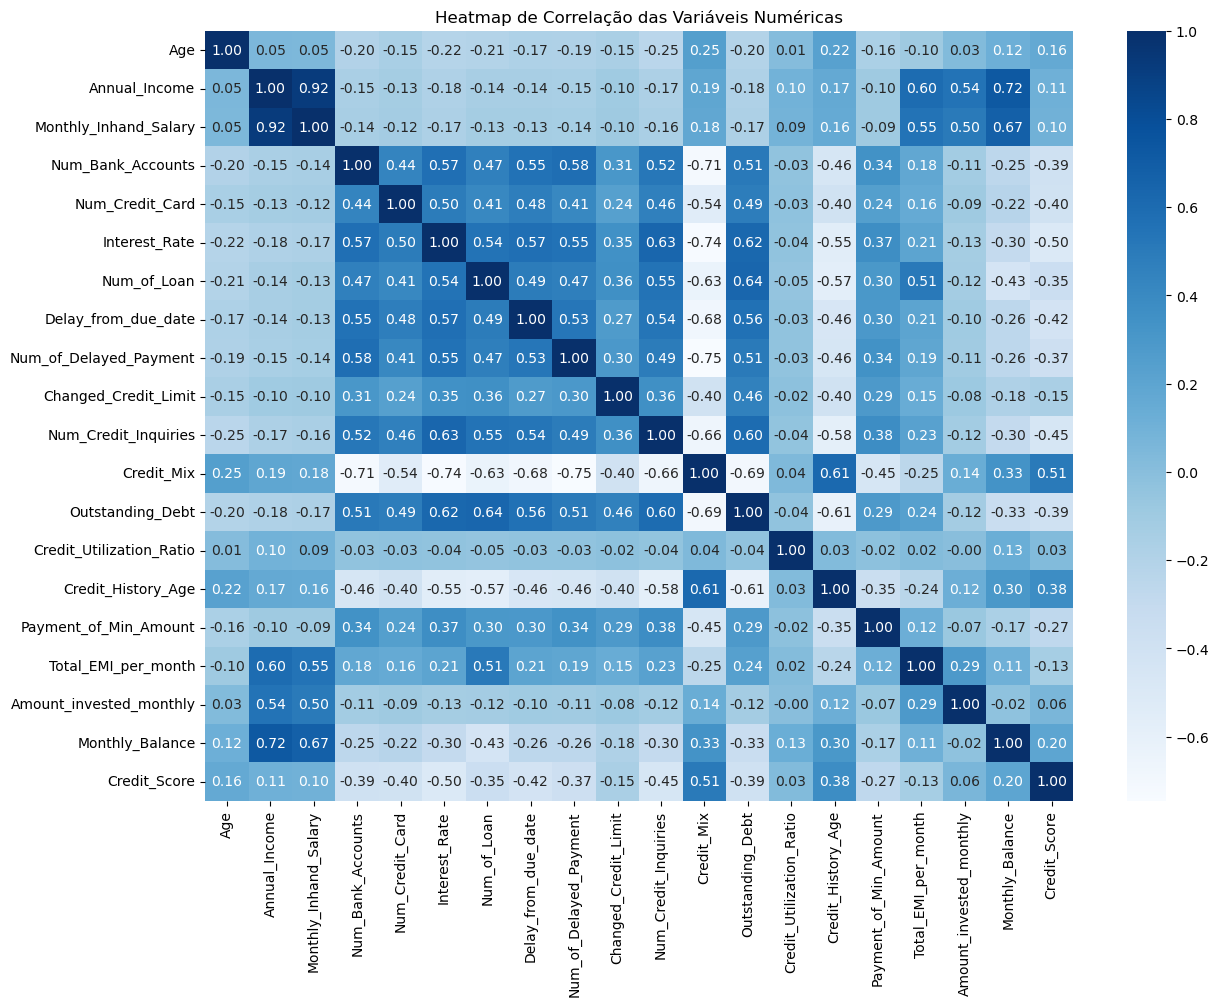

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap de Correlação das Variáveis Numéricas')
plt.show()


<i><p style='color:#006DB2' ><big><strong>10.</strong></big>Modelos de Classificação </p>
<br>
<p style='color:#006DB2' ><big><strong>Random Forest</strong></big></p>


<p style='color:#006DB2' ><li style='color:#006DB2' >Cria pipeline com StandardScaler e RandomForestClassifier.</li>
<li style='color:#006DB2' >Usa GridSearchCV para otimizar hiperparâmetros.</li>
<li style='color:#006DB2' >Exibe melhor score e parâmetros</li></p></i>
<br>

<p style='color:#006DB2' ><big><strong>LightGBM</strong></big></p>

<p style='color:#006DB2' ><li style='color:#006DB2' >Prepara dados e aplica StandardScaler.</li>
<li style='color:#006DB2' >Treina LGBMClassifier com GridSearchCV.</li>
<li style='color:#006DB2' >Exibe melhor score e parâmetros.</li></p></i>
<br>

<p style='color:#006DB2' ><big><strong>XGBoost</strong></big></p>

<p style='color:#006DB2' ><li style='color:#006DB2' >Prepara dados e aplica StandardScaler.</li>
<li style='color:#006DB2' >Treina XGBClassifier com GridSearchCV.</li>
<li style='color:#006DB2' >Exibe melhor score e parâmetros.</li></p></i>

In [14]:
X = df[var_num].fillna(df[var_num].mean())
y = df['Credit_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None]
}

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Melhor score:", grid.best_score_)
print("Melhores parâmetros:", grid.best_params_)

Melhor score: 0.7720135363790187
Melhores parâmetros: {'rf__max_depth': None, 'rf__n_estimators': 200}


In [15]:

X_lgbm = df[var_num].fillna(df[var_num].mean())
y_lgbm = df['Credit_Score']

X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(X_lgbm, y_lgbm, test_size=0.2, random_state=42)

scaler_lgbm = StandardScaler()
X_train_lgbm_scaled = scaler_lgbm.fit_transform(X_train_lgbm)
X_test_lgbm_scaled = scaler_lgbm.transform(X_test_lgbm)

lgbm_model = LGBMClassifier(random_state=42)
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, -1]
}

grid_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=3, scoring='accuracy')
grid_lgbm.fit(X_train_lgbm_scaled, y_train_lgbm)

print("Melhor score LightGBM:", grid_lgbm.best_score_)
print("Melhores parâmetros LightGBM:", grid_lgbm.best_params_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2539
[LightGBM] [Info] Number of data points in the train set: 19700, number of used features: 18
[LightGBM] [Info] Start training from score -1.138483
[LightGBM] [Info] Start training from score -0.634017
[LightGBM] [Info] Start training from score -1.902209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [16]:
X_xgb = df[var_num].fillna(df[var_num].mean())
y_xgb = df['Credit_Score']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

scaler_xgb = StandardScaler()
X_train_xgb_scaled = scaler_xgb.fit_transform(X_train_xgb)
X_test_xgb_scaled = scaler_xgb.transform(X_test_xgb)

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='accuracy')
grid_xgb.fit(X_train_xgb_scaled, y_train_xgb)

print("Melhor score XGBoost:", grid_xgb.best_score_)
print("Melhores parâmetros XGBoost:", grid_xgb.best_params_)


Melhor score XGBoost: 0.7566835871404399
Melhores parâmetros XGBoost: {'max_depth': 10, 'n_estimators': 100}
